# Longevity Analysis
In this notebook, we try to analyse what makes a character succeed.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
%matplotlib inline
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import math
import re
import string
import pickle
from collections import Counter

Load the dataset

In [2]:
marvel_pers = pd.read_pickle("marvel_pers_final.txt")
dc_pers = pd.read_pickle("dc_pers_final.txt")


In [4]:
def clean_years(l):
    if l is None:
        new_l = []
    else:
        new_l = [year for year in l if year>1930]
        
    return new_l
    
dc_pers['years'] = dc_pers['years'].apply(clean_years)
marvel_pers['years'] = marvel_pers['years'].apply(clean_years)
dc_pers['years']
dc_pers['First_apparition'] = dc_pers['years'].apply(lambda x: min(x) if len(x)!=0 else None)    
marvel_pers['First_apparition'] = marvel_pers['years'].apply(lambda x: min(x) if len(x)!=0 else None)   

Find the longevity of each character, i.e. the number of year it appears

In [22]:
marvel_pers['Longevity'] = marvel_pers['years'].apply(lambda years: len(list(set(years))))
dc_pers['Longevity'] = dc_pers['years'].apply(lambda years: len(list(set(years))))

In [21]:
marvel_pers.head(10)

,URL,Real Name,Identity,Current Alias,Citizenship,Marital Status,Occupation,Education,Gender,Height,...,Good_count,Bad_count,Neutral_count,Dates,Behavior,Number_of_apparitions,DatesString,years,First_apparition,Longevity
0,/wiki/Aaron_the_Aakon_(Earth-616),Aaron,Secret Identity,Unknown,Aakon,Single,Slave trader,Unknown,Male,Unknown,...,0,0,0,[],Good,0,,[],NaN,0
1,/wiki/2-D_(Earth-616),Darell (full name unrevealed),Secret Identity,2-D,American,Single,Adventurer,Unknown,Male,Unknown,...,4,0,0,"[January, 2008, July, 2011, September, 2011, J...",Good,4,"January, 2008,July, 2011,September, 2011,Janua...","[2008, 2011, 2011, 2019]",2008.0,3
2,/wiki/Abraham_Erskine_(Earth-616),Abraham Erskine,Known to Authorities Identity,Dr. Joseph Reinstein,"German, American",Married,Scientist,Advanced College Degree,Male,"5' 6"" (1.68 m)",...,40,1,50,"[March, 1941, November, 1946, March, 1965, Jan...",Neutral,91,"March, 1941,November, 1946,March, 1965,January...","[1941, 1946, 1965, 1969, 1971, 1975, 1976, 197...",1941.0,35
3,/wiki/11-Ball_(Earth-616),Unknown,Secret Identity,11-Ball,American,Single,Professional criminal; former henchman,Unknown,Male,Unknown,...,0,1,0,"[July, 1991]",Bad,1,"July, 1991",[1991],1991.0,1
4,/wiki/Abraham_(Earth-616),Abraham,No Dual Identity,Unknown,Unknown,Married,Prophet,Unknown,Male,Unknown,...,1,0,6,"[December, 1953, February, 1954, December, 195...",Neutral,7,"December, 1953,February, 1954,December, 1953,N...","[1953, 1954, 1953, 1988, 2011, 2017, 2020]",1953.0,6
5,/wiki/Abarac_(Earth-616),Abarac,No Dual Identity,Unknown,Cybernian,Single,"Court magician, advisor",Unknown,Male,Unknown,...,1,0,0,"[November, 1970]",Good,1,"November, 1970",[1970],1970.0,1
6,/wiki/Abdul_Faoul_(Earth-616),Professor Abdul Faoul,Secret Identity,Scarlet Scarab,Egyptian,Single,"Archeologist, adventurer",Unknown,Male,Unknown,...,0,4,3,"[December, 1977, February, 1978, June, 2014, J...",Bad,7,"December, 1977,February, 1978,June, 2014,July,...","[1977, 1978, 2014, 2014, 1981, 1982, 2013]",1977.0,6
7,/wiki/A.C._O%27Connor_(Earth-616),A. C. O'Connor,No Dual Identity,Ace O'Connor,American,Single,Journalist,Unknown,Female,Unknown,...,0,0,5,"[September, 1980, October, 1980, December, 198...",Neutral,5,"September, 1980,October, 1980,December, 1980,F...","[1980, 1980, 1980, 1981, 1981]",1980.0,2
8,/wiki/7-X9_(Earth-616),Unknown,No Dual Identity,7-X9,Unknown,Unknown,Unknown,Unknown,Male,Unknown,...,0,1,0,"[March, 2016]",Bad,1,"March, 2016",[2016],2016.0,1
9,/wiki/803_(Earth-616),803,No Dual Identity,Unknown,Unknown,Single,Unknown,Unknown,Agender,Unknown,...,14,0,1,"[February, 2016, January, 2016, March, 2016, A...",Good,15,"February, 2016,January, 2016,March, 2016,April...","[2016, 2016, 2016, 2016, 2016, 2016, 2016, 201...",2016.0,2


Discover the most famous character that are good and bad

In [30]:
#20 most appearance at MARVEL
appear_20 = marvel_pers.sort_values('Number_of_apparitions',ascending=False).head(10)[['Real Name','Current Alias']]
appear_20

,Real Name,Current Alias
20183,Peter Benjamin Parker,Spider-Man
24326,"Steven ""Steve"" Rogers",Captain America
1290,"Anthony Edward ""Tony"" Stark",Iron Man
11709,James Howlett,Wolverine
25251,Thor Odinson,All-Father Thor
3444,Robert Bruce Banner,Hulk
21335,Reed Richards,Mister Fantastic
2576,"Benjamin Jacob ""Ben"" Grimm",The Thing
22813,Scott Summers,Cyclops
10461,"Dr. Henry ""Hank"" Philip McCoy",Beast


In [31]:
#20 most longevity at MARVEL
long_20 = marvel_pers.sort_values('Longevity',ascending=False).head(10)[['Real Name','Current Alias']]
long_20

,Real Name,Current Alias
18466,Namor McKenzie,Sub-Mariner
10948,The Human Torch,Human Torch
24326,"Steven ""Steve"" Rogers",Captain America
19762,"Patricia ""Patsy"" Walker",Hellcat
319,Adolf Hitler,Unknown
11781,James Buchanan Barnes,Winter Soldier
15373,Loki Laufeyson,Unknown
12750,Johann Shmidt,Red Skull
2576,"Benjamin Jacob ""Ben"" Grimm",The Thing
21335,Reed Richards,Mister Fantastic


In [29]:
#both longevity and nb appearance
pd.merge(appear_20,long_20)

,Real Name,Current Alias
0,"Steven ""Steve"" Rogers",Captain America
1,Reed Richards,Mister Fantastic
2,"Benjamin Jacob ""Ben"" Grimm",The Thing


We can see that only 3 characters are in the top 20 in number of appearance and in longevity. Maybe we need to define the "famousity" of a character. The famousity will be defined as the harmonic mean between the appearance and the longevity.

To determine the function, we need to see the ditribution of the Longevity and NB of appearance.

/Users/jordanmetz/anaconda3/envs/ada/lib/python3.7/site-packages/ipykernel_launcher.py:39: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


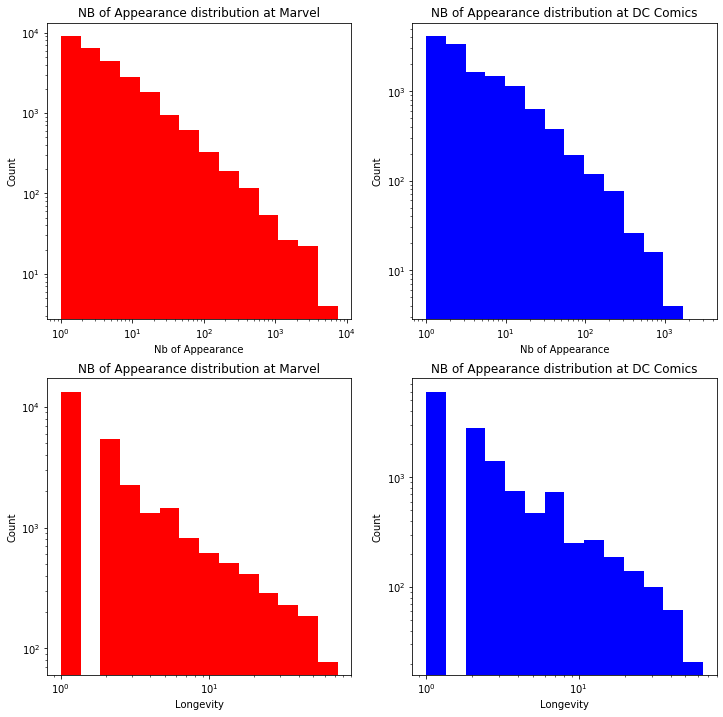

In [87]:
fig, axs = plt.subplots(2, 2, figsize=(12,12))
#h, bins,_ = plt.hist(marvel_pers['Number_of_apparitions'],bins=10)
nb_bins = 15
logbins = np.logspace(np.log10(1),np.log10(max(marvel_pers['Number_of_apparitions'])),nb_bins)
axs[0,0].hist(marvel_pers['Number_of_apparitions'], color = 'red', bins=logbins)
axs[0,0].set_title('NB of Appearance distribution at Marvel')
axs[0,0].set_xlabel('Nb of Appearance')
axs[0,0].set_ylabel('Count')
axs[0,0].set_xscale('log')
axs[0,0].set_yscale('log')

nb_bins = 15
logbins = np.logspace(np.log10(1),np.log10(max(dc_pers['Number_of_apparitions'])),nb_bins)
axs[0,1].hist(dc_pers['Number_of_apparitions'], color = 'blue', bins=logbins)
axs[0,1].set_title('NB of Appearance distribution at DC Comics')
axs[0,1].set_xlabel('Nb of Appearance')
axs[0,1].set_ylabel('Count')
axs[0,1].set_xscale('log')
axs[0,1].set_yscale('log')

nb_bins = 15
logbins = np.logspace(np.log10(1),np.log10(max(marvel_pers['Longevity'])),nb_bins)
axs[1,0].hist(marvel_pers['Longevity'], color = 'red',bins=logbins)
axs[1,0].set_title('NB of Appearance distribution at Marvel')
axs[1,0].set_xlabel('Longevity')
axs[1,0].set_ylabel('Count')
axs[1,0].set_xscale('log')
axs[1,0].set_yscale('log')

nb_bins = 15
logbins = np.logspace(np.log10(1),np.log10(max(dc_pers['Longevity'])),nb_bins)
axs[1,1].hist(dc_pers['Longevity'], color = 'blue', bins=logbins)
axs[1,1].set_title('NB of Appearance distribution at DC Comics')
axs[1,1].set_xlabel('Longevity')
axs[1,1].set_ylabel('Count')
axs[1,1].set_xscale('log')
axs[1,1].set_yscale('log')

fig.show()
plt.savefig('img/longevity/histogram_appareace_longevity.png')

We see that the distribution really follows power laws. So for famousity, we could take the mean of the normalized logarithm, i.e:
$$\text{Famous} = \frac{\frac{\log(\text{longevity})}{\max(\log(\text{longevity}))}+\frac{\log(\text{Appearance})}{\max(\log(\text{Appearance}))}}{2}$$

In [34]:
marvel_pers['Famous']=1/(1/marvel_pers['Number_of_apparitions']+1/marvel_pers['Longevity'])
dc_pers['Famous']=1/(1/dc_pers['Number_of_apparitions']+1/dc_pers['Longevity'])

In [75]:
marvel_pers['Famous']=(np.log(marvel_pers['Number_of_apparitions'])/max(np.log(marvel_pers['Number_of_apparitions']))+np.log(marvel_pers['Longevity'])/max(np.log(marvel_pers['Longevity'])))/2
dc_pers['Famous']=(np.log(dc_pers['Number_of_apparitions'])/max(np.log(dc_pers['Number_of_apparitions']))+np.log(dc_pers['Longevity'])/max(np.log(dc_pers['Longevity'])))/2

In [76]:
#Top 10 famous character at Marvel
marvel_pers.sort_values('Famous',ascending=False).head(10)[['Real Name','Current Alias']]

,Real Name,Current Alias
24326,"Steven ""Steve"" Rogers",Captain America
20183,Peter Benjamin Parker,Spider-Man
1290,"Anthony Edward ""Tony"" Stark",Iron Man
25251,Thor Odinson,All-Father Thor
21335,Reed Richards,Mister Fantastic
2576,"Benjamin Jacob ""Ben"" Grimm",The Thing
3444,Robert Bruce Banner,Hulk
18466,Namor McKenzie,Sub-Mariner
13168,"Jonathan Lowell Spencer ""Johnny"" Storm",Human Torch
22813,Scott Summers,Cyclops


In [82]:
#Top 10 famous character at DC
dc_pers.sort_values('Famous',ascending=False).head(10)[['Real Name','Current Alias']]

,Real Name,Current Alias
5892,Kal-El (birth name);Clark Kent (legal name),Superman
1507,Bruce Wayne,Batman
4193,"Harold ""Hal"" Jordan",Green Lantern
4665,J'onn J'onzz,Martian Manhunter
8349,Orin,Aquaman
1198,"Bartholomew Henry ""Barry"" Allen",The Flash
329,Alan Ladd Wellington Scott,Green Lantern
5082,"Jason Peter ""Jay"" Garrick",The Flash
11244,"Wallace Rudolph ""Wally"" West",The Flash
1664,Bruce Wayne,Batman


It looks to work, since we find the top of the two list + the ones that are in both list. Let's check, if this techniques for both good and bad character, and see if we recognize them

In [77]:
#10 most famous GOOD character at MARVEL
marvel_pers[marvel_pers['Behavior']=='Good'].sort_values('Famous',ascending=False).head(10)[['Real Name','Current Alias']]

,Real Name,Current Alias
24326,"Steven ""Steve"" Rogers",Captain America
20183,Peter Benjamin Parker,Spider-Man
1290,"Anthony Edward ""Tony"" Stark",Iron Man
25251,Thor Odinson,All-Father Thor
21335,Reed Richards,Mister Fantastic
2576,"Benjamin Jacob ""Ben"" Grimm",The Thing
3444,Robert Bruce Banner,Hulk
18466,Namor McKenzie,Sub-Mariner
13168,"Jonathan Lowell Spencer ""Johnny"" Storm",Human Torch
22813,Scott Summers,Cyclops


In [78]:
#10 most famous bad character at MARVEL
marvel_pers[marvel_pers['Behavior']=='Bad'].sort_values('Famous',ascending=False).head(10)[['Real Name','Current Alias']]

,Real Name,Current Alias
15373,Loki Laufeyson,Unknown
27216,Wilson Grant Fisk,Kingpin
12750,Johann Shmidt,Red Skull
27138,William Baker,Sandman
17383,Mephisto,Unknown
210,Adrian Toomes,Vulture
23079,Sergei Nikolaevich Kravinoff (originally Serge...,Kraven the Hunter
3614,Cain Marko,Juggernaut
26666,Vlad Dracula,Dracula
874,Amora,Enchantress


In [79]:
#10 most famous good character at DC COMICS
dc_pers[dc_pers['Behavior']=='Good'].sort_values('Famous',ascending=False).head(10)[['Real Name','Current Alias']]

,Real Name,Current Alias
5892,Kal-El (birth name);Clark Kent (legal name),Superman
1507,Bruce Wayne,Batman
4193,"Harold ""Hal"" Jordan",Green Lantern
4665,J'onn J'onzz,Martian Manhunter
8349,Orin,Aquaman
1198,"Bartholomew Henry ""Barry"" Allen",The Flash
329,Alan Ladd Wellington Scott,Green Lantern
5082,"Jason Peter ""Jay"" Garrick",The Flash
11244,"Wallace Rudolph ""Wally"" West",The Flash
1664,Bruce Wayne,Batman


In [80]:
#10 most famous good character at DC COMICS
dc_pers[dc_pers['Behavior']=='Bad'].sort_values('Famous',ascending=False).head(10)[['Real Name','Current Alias']]

,Real Name,Current Alias
11996,Alexander Joseph Luthor,Lex Luthor
21533,Uxas,Darkseid
12161,Alexis Luthor,Lex Luthor
16602,Unknown,The Joker
15259,"George ""Digger"" Harkness",Captain Boomerang
15635,Harvey Dent,Two-Face
11874,Adolf Hitler,Adolf Hitler
21182,Thaal Sinestro,Sinestro
15557,Grodd,Gorilla Grodd
21467,Vandar Adg II,Vandal Savage


Calculate the score in longevity, apparition and famousity out of 100

In [88]:
marvel_pers['Score appearance'] = np.log(marvel_pers['Number_of_apparitions'])/max(np.log(marvel_pers['Number_of_apparitions']))*100
marvel_pers['Score longevity'] = np.log(marvel_pers['Longevity'])/max(np.log(marvel_pers['Longevity']))*100
marvel_pers['Score Famous'] = 100*marvel_pers['Famous']
dc_pers['Score appearance'] = np.log(dc_pers['Number_of_apparitions'])/max(np.log(dc_pers['Number_of_apparitions']))*100
dc_pers['Score longevity'] = np.log(dc_pers['Longevity'])/max(np.log(dc_pers['Longevity']))*100
dc_pers['Score Famous'] = 100*dc_pers['Famous']

### Appearance over the years

In [140]:
category = 'Real Name'
nom = 'Steven "Steve" Rogers'
activity = pd.Series([])
activity[0] = pd.Series(marvel_pers[marvel_pers[category]==nom]['years'].values[0]).value_counts()
appearance = marvel_pers[marvel_pers[category]==nom]['Score appearance'].values[0]
longevity = marvel_pers[marvel_pers[category]==nom]['Score longevity'].values[0]
famous = marvel_pers[marvel_pers[category]==nom]['Score Famous'].values[0]   
len(marvel_pers[marvel_pers[category]==nom]['years'])==1

True

In [134]:
activity[0]

2019    310
2012    298
2006    289
2014    280
2011    266
       ... 
2020     10
1954      2
1963      2
1953      1
1946      1
Length: 66, dtype: int64

In [119]:
marvel_pers[marvel_pers['Current Alias']=='Steven "Steve" Rogers']['Score Famous'].values[0]

97.8972721163895

/Users/jordanmetz/anaconda3/envs/ada/lib/python3.7/site-packages/ipykernel_launcher.py:69: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


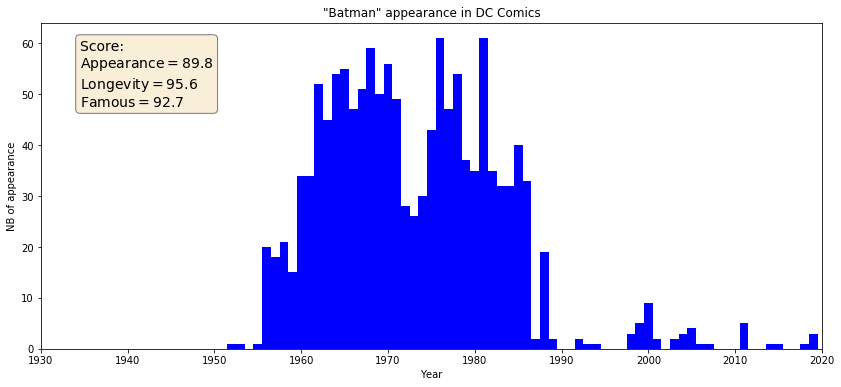

In [173]:
def plot_longevity(category, name):
    n = 0
    k = 0
    is_ = np.empty(2)
    activity = pd.Series([])
    try:
        if len(marvel_pers[marvel_pers[category]==name]['years'])==True:
            print(3)
            activity[k] = pd.Series(marvel_pers[marvel_pers[category]==name]['years'].values[0]).value_counts()
            print(2)
            appearance = marvel_pers[marvel_pers[category]==name]['Score appearance'].values[0]
            print(1)
            longevity = marvel_pers[marvel_pers[category]==name]['Score longevity'].values[0]
            print('yesa')
            famous = marvel_pers[marvel_pers[category]==name]['Score Famous'].values[0]    
            print('yes')
        else:
            activity[k] = pd.Series(marvel_pers[marvel_pers[category]==name].sort_values(by='Score Famous',ascending=False)['years'].values[0]).value_counts()
            appearance = marvel_pers[marvel_pers[category]==name].sort_values(by='Score Famous',ascending=False)['Score appearance'].values[0]
            longevity = marvel_pers[marvel_pers[category]==name].sort_values(by='Score Famous',ascending=False)['Score longevity'].values[0]
            famous = marvel_pers[marvel_pers[category]==name].sort_values(by='Score Famous',ascending=False)['Score Famous'].values[0]   
        is_[n] = 1
        k += 1
    except:
        is_[n] = 0
    n+=1
    try:
        if len(dc_pers[dc_pers[category]==nom]['years'])==True:
            activity[k] = pd.Series(dc_pers[dc_pers[category]==name]['years'].values[0]).value_counts()
            appearance = dc_pers[dc_pers[category]==name]['Score appearance'].values[0]
            longevity = dc_pers[dc_pers[category]==name]['Score longevity'].values[0]
            famous = dc_pers[dc_pers[category]==name]['Score Famous'].values[0]  
        else:
            activity[k] = pd.Series(dc_pers[dc_pers[category]==name].sort_values(by='Score Famous',ascending=False)['years'].values[0]).value_counts()
            appearance = dc_pers[dc_pers[category]==name].sort_values(by='Score Famous',ascending=False)['Score appearance'].values[0]
            longevity = dc_pers[dc_pers[category]==name].sort_values(by='Score Famous',ascending=False)['Score longevity'].values[0]
            famous = dc_pers[dc_pers[category]==name].sort_values(by='Score Famous',ascending=False)['Score Famous'].values[0]   
        is_[n] = 1
        k += 1
    except:
        is_[n] = 0
    n+=1
    fig, axs = plt.subplots(1,1,figsize=(14,k*6))
    l = 0
    for j in range(2):
        if is_[j]:
            if j==0:
                axs.bar(x = activity[l].index, height = activity[l], width = 1, color='red')
            else:
                axs.bar(x = activity[l].index, height = activity[l], width = 1, color='blue')
            axs.set_xlabel('Year')
            axs.set_ylabel('NB of appearance')
            axs.set_xlim(1930,2020)
            if j == 0:
                axs.set_title('"'+name + '" appearance in Marvel Comics')
            else:
                axs.set_title('"'+name + '" appearance in DC Comics')
            l+=1
    textstr = '\n'.join((\
    'Score: \n'\
    r'$\mathrm{Appearance}=%.1f$' % (appearance, ),\
    r'$\mathrm{Longevity}=%.1f$' % (longevity, ),\
    r'$\mathrm{Famous}=%.1f$' % (famous, )))        
    # these are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    # place a text box in upper left in axes coords
    axs.text(0.05, 0.95, textstr, transform=axs.transAxes, fontsize=14,\
        verticalalignment='top', bbox=props)
    fig.show()
    plt.savefig('img/longevity/'+name+'.png')

plot_longevity('Current Alias','Batman')

In [174]:
dc_pers[dc_pers['Current Alias']=='Batman'].sort_values(by='Score Famous',ascending=False)

,URL,Real Name,Identity,Current Alias,Citizenship,Good or Bad,Marital Status,Occupation,Education,Gender,...,Behavior,Number_of_apparitions,DatesString,years,First_apparition,Longevity,Famous,Score appearance,Score longevity,Score Famous
1507,wiki/Bruce_Wayne_(Earth-One),Bruce Wayne,Secret Identity,Batman,American,Good,Single,Businessman,Unknown,Male,...,Good,1326,"December, 1964,December, 1964,December, 1964,M...","[1964, 1964, 1964, 1965, 1965, 1965, 1965, 196...",1952.0,54,0.926656,89.772689,95.558552,92.665620
1664,wiki/Bruce_Wayne_(New_Earth),Bruce Wayne,Secret Identity,Batman,American,Good,Single,"Businessman, Vigilante and Adventurer.",Unknown,Male,...,Good,1482,"January, 2008,May, 2005,December, 2001,June, 2...","[2008, 2005, 2001, 2000, 1999, 2002, 1999, 199...",1965.0,37,0.888316,91.161441,86.501747,88.831594
1465,wiki/Bruce_Wayne_(Earth-Two),Bruce Wayne,Secret Identity,Batman,American,Good,Widowed,Detective · Police Commissioner,Unknown,Male,...,Good,374,"1953,1953,December, 1964,December, 1964,Decemb...","[1953, 1953, 1964, 1964, 1964, 1964, 1965, 198...",1940.0,54,0.847641,73.969698,95.558552,84.764125
1502,wiki/Bruce_Wayne_(DCAU),Bruce Thomas Wayne,Secret Identity,Batman,American,Good,Widowed,Businessman,Unknown,Male,...,Good,94,"April, 1997,September, 1998,August, 1998,2000,...","[1997, 1998, 1998, 2000, 2004, 2004, 2004, 200...",1993.0,15,0.608001,56.727149,64.872999,60.800074
10508,wiki/Terrence_McGinnis_(DCAU),"Terrence ""Terry"" McGinnis",Secret Identity,Batman,American,Good,Engaged,Unknown,Unknown,Male,...,Good,41,"2000,2000,March, 1999,May, 1999,October, 2000,...","[2000, 2000, 1999, 1999, 2000, 2000, 2000, 200...",1999.0,10,0.507636,46.367310,55.159834,50.763572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1736,wiki/Bruce_Wayne_(Toxic_Chill_%26_Justice_Unba...,Bruce Wayne,Secret Identity,Batman,American,Good,Unknown,Unknown,Unknown,Male,...,Good,0,,[],NaN,0,-inf,-inf,-inf,-inf
1500,wiki/Bruce_Wayne_(Flashpoint_Paradox),Bruce Wayne,Secret Identity,Batman,American,Good,Single,Vigilante,Unknown,Male,...,Good,0,,[],NaN,0,-inf,-inf,-inf,-inf
1731,wiki/Bruce_Wayne_(Lois_%26_Clark),Bruce Wayne,Secret Identity,Batman,American,Good,Unknown,Unknown,Unknown,Male,...,Good,0,,[],NaN,0,-inf,-inf,-inf,-inf
1511,wiki/Bruce_Wayne_(Filmation_Adventures),Bruce Wayne,Secret Identity,Batman,American,Good,Single,Unknown,Unknown,Male,...,Good,0,,[],NaN,0,-inf,-inf,-inf,-inf


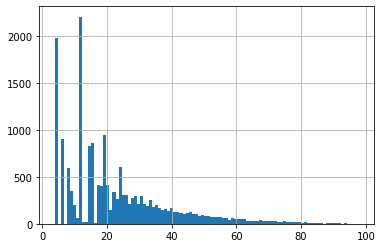

In [183]:
marvel_pers[marvel_pers['Score Famous']>0]['Score Famous'].hist(bins=100)